# Data Visualization

## Objective
* Visualize the distribution of data.
* Visualize the relationship between two features.
* Visualize composition of data.
* Visualize comparison of data.

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Connect to the database
conn = sqlite3.connect("m4_survey_data.sqlite")
cur = conn.cursor()

In [3]:
%load_ext sql
%sql sqlite:///m4_survey_data.sqlite

In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
QUERY = """ 
SELECT DevType, COUNT(*) AS count FROM DevType
GROUP BY DevType
ORDER BY count DESC
LIMIT 5;
"""

pd.read_sql(QUERY,conn)

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


In [7]:
#How to run a group by query
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
limit 5
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


In [8]:
#How to describe a table
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

<Axes: ylabel='Frequency'>

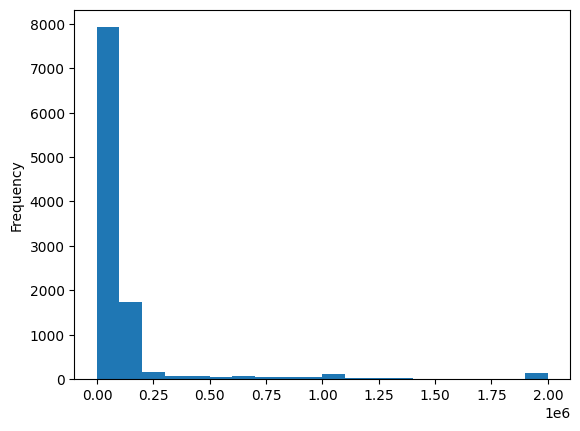

In [9]:
#Plot a histogram of ConvertedComp.
QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df['ConvertedComp'].plot(kind='hist', bins=20)

<Axes: >

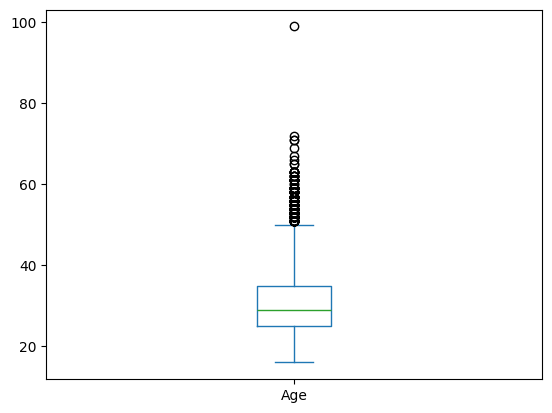

In [10]:
#Plot a box plot of Age
QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df['Age'].plot(kind='box')

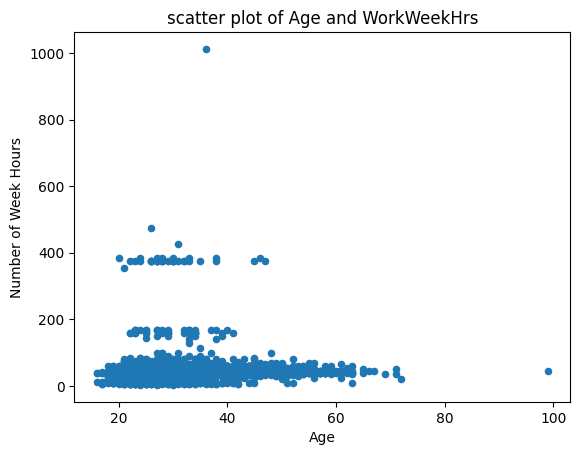

In [11]:
#Create a scatter plot of Age and WorkWeekHrs
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

import matplotlib as mpl
import matplotlib.pyplot as plt

df_scat = pd.read_sql_query(QUERY,conn)
df_scat.plot(
    kind = 'scatter',
    x='Age',
    y='WorkWeekHrs',
)
plt.title('scatter plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Number of Week Hours')

plt.show()
#or use df_scat.plot(kind='scatter', x= ,y= figsize=(x,y), color='')

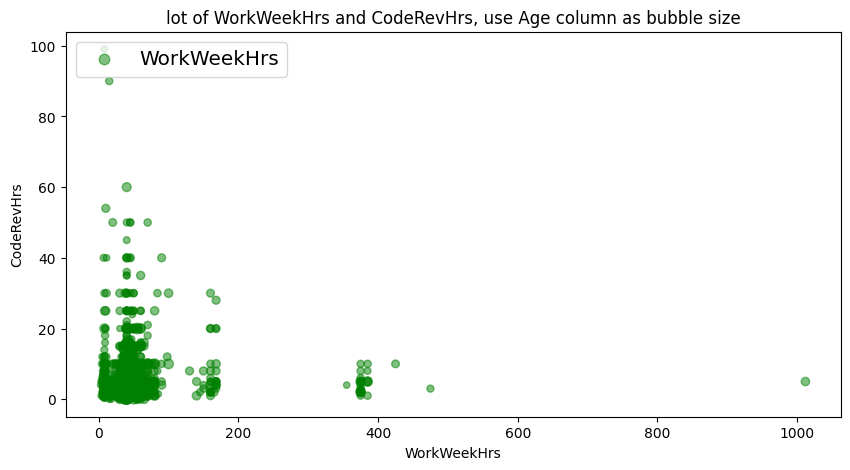

In [12]:
#Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""

df_buble = pd.read_sql_query(QUERY,conn)

ax0 = df_buble.plot(kind='scatter',
    x='WorkWeekHrs',
    y='CodeRevHrs',
    figsize=(10,5),
    alpha=0.5,
    color='green',
    s='Age'
)
ax0.set_ylabel('CodeRevHrs')
ax0.set_title('lot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size')
ax0.legend(['WorkWeekHrs','CodeRevHrs'], loc='upper left', fontsize='x-large')

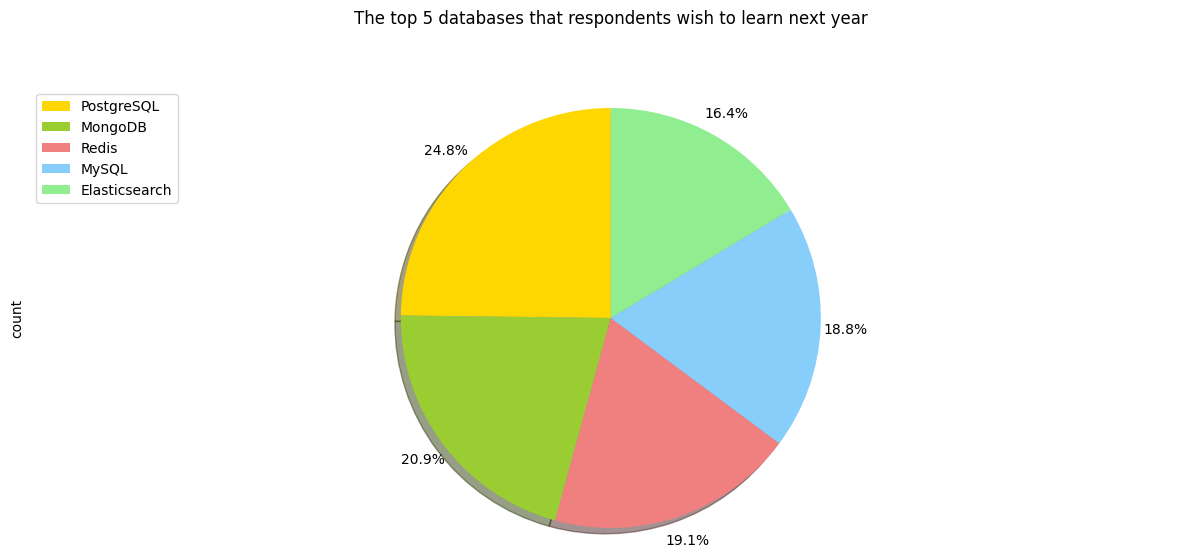

In [13]:
#Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names.
#Display percentages of each database on the pie chart.
QUERY="""
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""
df_pie= pd.read_sql_query(QUERY,conn)

df_pie.set_index('DatabaseDesireNextYear', inplace=True)
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']

df_pie['count'].plot(kind='pie',
                     figsize=(15,6),
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None, #turn off labels on pie chart
                     pctdistance=1.12, #ratio between center of the chart and the sart of text generated by autopct
                     colors=colors_list,
                    )
plt.title('The top 5 databases that respondents wish to learn next year', y=1.12)
plt.axis('equal')
plt.legend(labels=df_pie.index, loc='upper left')
plt.show()

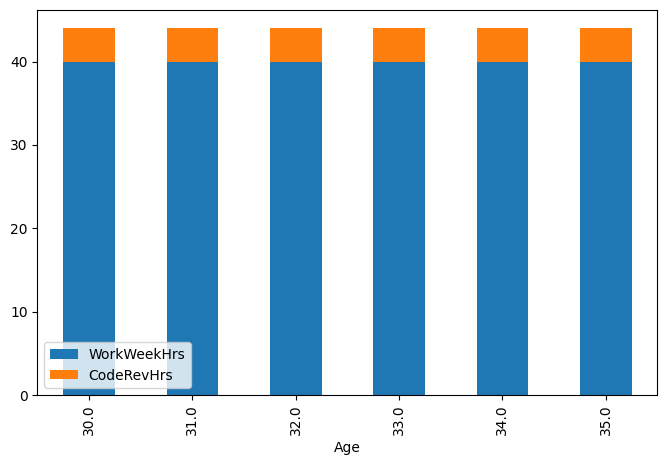

In [14]:
#Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.
QUERY="""
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df= pd.read_sql_query(QUERY,conn)

df_stack = df.groupby(['Age']).median()
df_stack

df_stack.plot(kind='bar', figsize=(8,5), stacked=True)
plt.show()

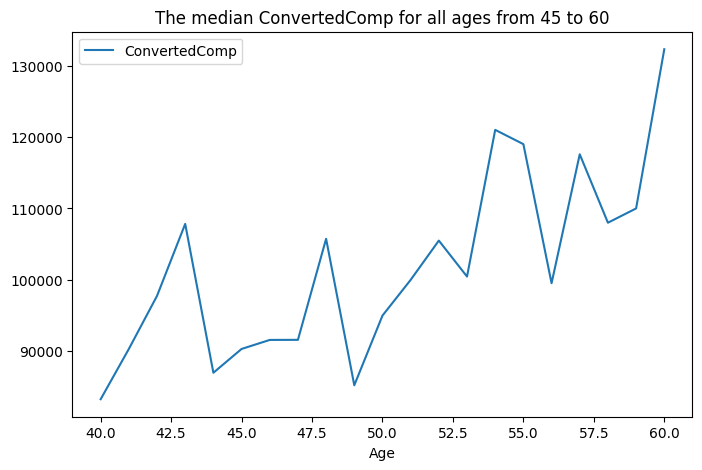

In [15]:
#Plot the median ConvertedComp for all ages from 45 to 60
QUERY="""
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 40 AND 60
"""
df= pd.read_sql_query(QUERY,conn)
df_med = df.groupby('Age').median()
df_med

df_med.plot(kind='line', figsize=(8,5))
plt.title('The median ConvertedComp for all ages from 45 to 60')
plt.show()

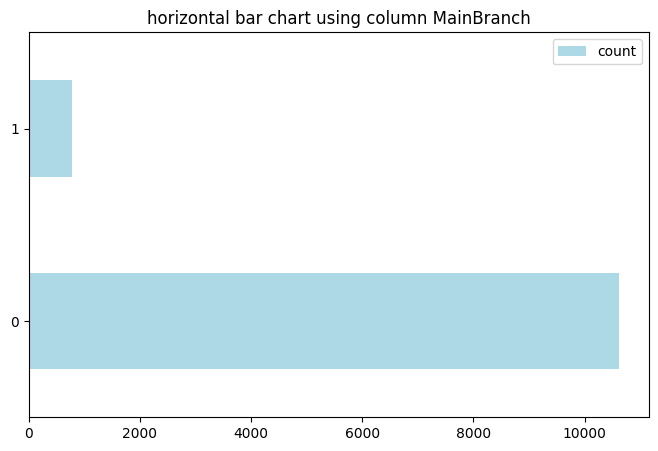

,MainBranch,count
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


In [16]:
#Create a horizontal bar chart using column MainBranch
QUERY="""
SELECT MainBranch, COUNT(*) as count
FROM master
GROUP BY MainBranch
"""
df_bar= pd.read_sql_query(QUERY,conn)

df_bar.plot(kind='barh', figsize=(8,5), color='lightblue')
plt.title('horizontal bar chart using column MainBranch')
plt.show()
df_bar

In [17]:
conn.close()